In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sheet_names = ['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007']
sheets_dict = pd.read_excel("../Resources/2007-2023-PIT-Counts-by-State.xlsb", sheet_name=sheet_names, engine='pyxlsb')

In [6]:
common_columns = set(sheets_dict[sheet_names[0]].columns)
for sheet_name in sheet_names[1:]:
    common_columns.intersection_update(sheets_dict[sheet_name].columns)

common_columns = list(common_columns)

In [7]:
for year, df in sheets_dict.items():
    sheets_dict[year] = df[common_columns].copy()

In [8]:
for year, df in sheets_dict.items():
    df['Year'] = int(year)  

combined_df = pd.concat(sheets_dict.values(), ignore_index=True)

In [9]:
combined_df = combined_df[~combined_df['State'].isin(['MP', 'AS', 'Total'])]
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')
combined_df.dropna(subset=['Year'], inplace=True)
combined_df['Year'] = combined_df['Year'].astype(int)

In [13]:
combined_df.drop([57, 58], axis=0, inplace=True)
combined_df.reset_index(drop=True, inplace=True)

In [21]:
combined_df.dtypes



Overall Homeless People in Families                  object
Sheltered Total Homeless Family Households           object
Overall Homeless Individuals                         object
Overall Homeless Veterans                            object
Sheltered Total Homeless Veterans                    object
Sheltered TH Homeless Individuals                    object
Overall Chronically Homeless Individuals             object
Unsheltered Homeless                                 object
Sheltered TH Homeless                                object
Sheltered Total Homeless Individuals                 object
Unsheltered Homeless Family Households               object
Unsheltered Homeless Veterans                        object
Unsheltered Homeless Individuals                     object
Unsheltered Chronically Homeless Individuals         object
Sheltered TH Homeless People in Families             object
Sheltered ES Homeless                                object
Sheltered Total Homeless                

In [18]:
null_values = combined_df.isnull().any()
null_values_found = False
for column, has_null in null_values.items():
    if has_null:
        null_values_found = True
        print(f"Column '{column}' has {combined_df[column].isnull().sum()} null values.")
if not null_values_found:
    print("No NULL values in dataframe.")

No NULL values in dataframe.


In [24]:
cols = combined_df.columns.difference(['State'])
combined_df[cols] = combined_df[cols].apply(pd.to_numeric, errors='coerce')



In [26]:
combined_df

,Overall Homeless People in Families,Sheltered Total Homeless Family Households,Overall Homeless Individuals,Overall Homeless Veterans,Sheltered Total Homeless Veterans,Sheltered TH Homeless Individuals,Overall Chronically Homeless Individuals,Unsheltered Homeless,Sheltered TH Homeless,Sheltered Total Homeless Individuals,...,State,Sheltered Total Chronically Homeless Individuals,Unsheltered Homeless People in Families,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered ES Homeless Individuals,Overall Homeless Family Households,Overall Homeless,Sheltered Total Homeless People in Families,Year
0,559,189,2055,119,102,141,704,468,382,1587,...,AK,575,0.0,115,318,1446,189,2614,559,2023
1,795,223,2509,291,179,223,690,1456,443,1162,...,AL,178,109.0,156,466,930,253,3304,686,2023
2,496,108,2113,205,121,187,768,1322,300,931,...,AR,202,140.0,77,243,744,149,2609,356,2023
3,2686,697,11551,932,646,793,3065,7615,1454,4271,...,AZ,1486,335.0,485,1690,3414,780,14237,2351,2023
4,25483,6208,155916,10589,3153,6666,67510,123423,11297,38492,...,CA,14341,5999.0,4688,14853,31258,7988,181399,19484,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,436,121,599,64,38,205,191,315,380,380,...,VT,60,96.0,61,165,175,154,1035,340,2007
914,10090,3238,13289,1421,1199,3838,2603,6522,10407,8113,...,WA,1333,1346.0,724,2175,4275,3722,23379,8744,2007
915,3245,1033,2403,466,449,892,689,563,2719,2071,...,WI,468,231.0,406,1187,1179,1108,5648,3014,2007
916,494,170,1915,787,760,173,1151,262,470,1724,...,WV,1058,71.0,55,126,1551,197,2409,423,2007


In [40]:
yearly_homelessness_summary = combined_df.groupby('Year')['Overall Homeless'].sum().reset_index()
X = yearly_homelessness_summary[['Year']]  
y = yearly_homelessness_summary['Overall Homeless']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [41]:
future_years = np.array([[year] for year in range(2024, 2029)])
future_predictions = model.predict(future_years)

c:\Users\scott_p9qjqkt\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
future_predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Overall Homeless': future_predictions})
future_predictions_df

,Year,Predicted Overall Homeless
0,2024,525412.367647
1,2025,518801.970588
2,2026,512191.573529
3,2027,505581.176471
4,2028,498970.779412


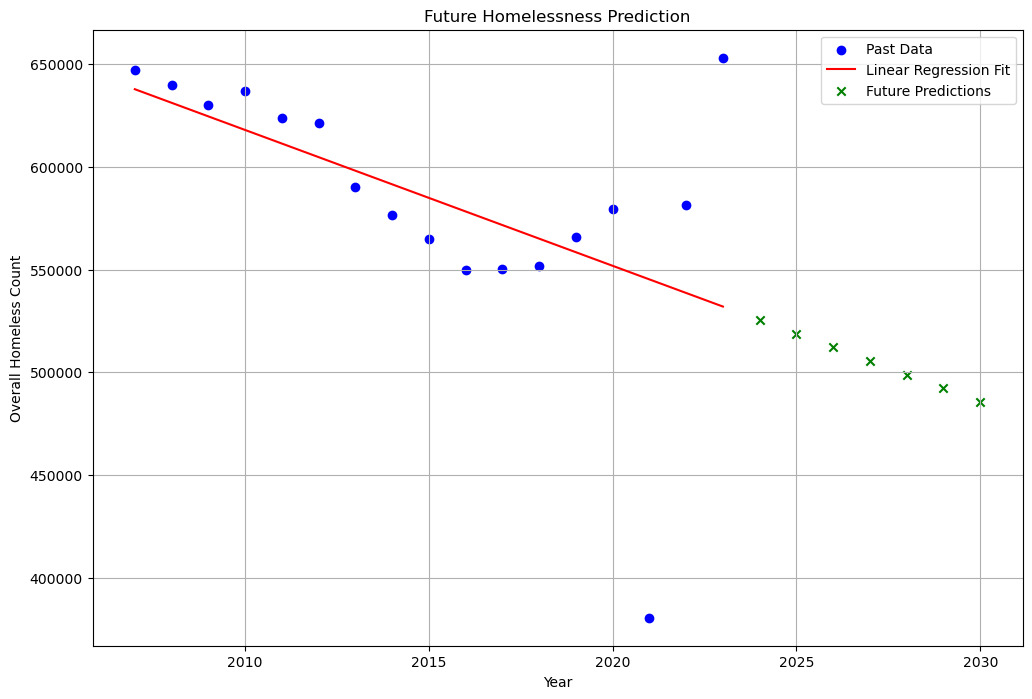

In [57]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Past Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression Fit')
plt.scatter(future_years, future_predictions, color='green', label ='Future Predictions', marker='x')
plt.title("Future Homelessness Prediction")
plt.xlabel("Year")
plt.ylabel("Overall Homeless Count")
plt.grid(True)
plt.legend()
plt.show()


